MODEL XGBoost

In [38]:
# importy bibliotek
import xgboost as xgb
import numpy as np
import pandas as pd
import time
import os
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTEN
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [39]:
# wczytanie zbioru
df = pd.read_csv(os.path.join(os.getcwd(), 'clean_dataset.csv'))

In [42]:
df.columns

Index(['Unnamed: 0', 'basket_icon_click', 'basket_add_list',
       'basket_add_detail', 'list_size_dropdown', 'closed_minibasket_click',
       'checked_delivery_detail', 'sign_in', 'saw_checkout', 'saw_homepage',
       'ordered'],
      dtype='object')

In [43]:
# podział na zmienne objaśniające i zmienną objaśnianą-target dla każdego zbioru
X = df.drop(['Unnamed: 0', 'ordered'], axis=1)
y = df['ordered']

In [46]:
# podział zbioru "treningowego" na zbiór treningowy i testowy
# rezygnujemy z oryginalnego zbioru testowego 
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, stratify=y)

In [47]:
# oversampling przy użyciu metody SMOTE
smote = SMOTEN (random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [51]:
#sprawdzenie zbalansowania
y_train_smote.value_counts(normalize=True)

0    0.5
1    0.5
Name: ordered, dtype: float64

Zbiór danych został zbalansowany w stosunku 50/50 

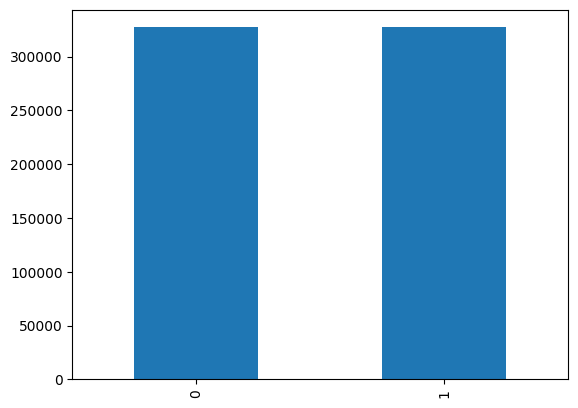

In [54]:
# przedstawienie zbalansowania na wykresie
pd.Series(y_train_smote).value_counts().plot.bar();

In [55]:
# stworzenie instancji klasyfikatora XGBoost
xgb_cl = xgb.XGBClassifier(
    n_estimators=100, 
    max_depth=3, 
    learning_rate=0.1,
    objective='binary:logistic', 
    booster='gbtree'
)

In [59]:
# trenowanie modelu z pomiarem czasu
start = time.time()
xgb_cl.fit(X_train_smote, y_train_smote)
end = time.time()
print("Czas treningu modelu XGBoost: ", end - start)

Czas treningu modelu XGBoost:  16.61424231529236


In [60]:
# predykcja modelu na zbiorze testowym
y_pred = xgb_cl.predict(X_test)

In [65]:
class_report_XGBoost = classification_report(y_test, y_pred, output_dict = True )
df_class_report_XGBoost = pd.DataFrame(class_report_XGBoost).transpose()
df_class_report_XGBoost.to_html('class_report_XGBoost.html')
print(df_class_report_XGBoost)


              precision    recall  f1-score        support
0              0.999603  0.992996  0.996289  109078.000000
1              0.860939  0.990991  0.921399    4773.000000
accuracy       0.992912  0.992912  0.992912       0.992912
macro avg      0.930271  0.991993  0.958844  113851.000000
weighted avg   0.993790  0.992912  0.993149  113851.000000


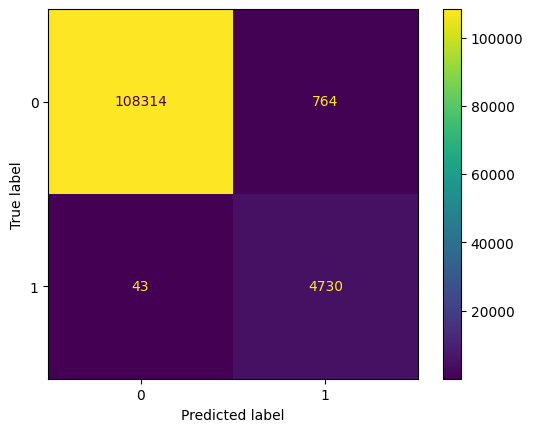

In [67]:
cm_XGBoost = confusion_matrix(y_test, y_pred)
disp_cm_XGBoost = ConfusionMatrixDisplay(cm_XGBoost)
disp_cm_XGBoost.plot();
plt.savefig('cm_XGBoost.png')